In [2]:
import re#For Regular expression
import pandas as pd
pd.set_option("display.max_colwidth",200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
pos_tweets=twitter_samples.strings('positive_tweets.json')
neg_tweets=twitter_samples.strings('negative_tweets.json')
print("Total positive tweets=",len(pos_tweets))
print("Total negative tweets=",len(neg_tweets))

Total positive tweets= 5000
Total negative tweets= 5000


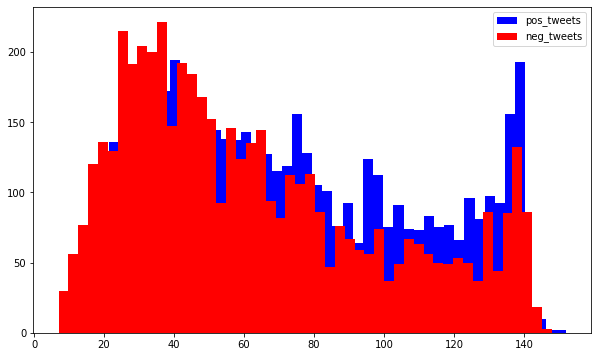

In [4]:
length_pos=[]
length_neg=[]
for i in range(5000):
    length_pos.append(len(pos_tweets[i]))
    length_neg.append(len(neg_tweets[i]))
plt.figure(figsize=(10,6))
plt.hist(length_pos,bins=50,label="pos_tweets",color='blue')
plt.hist(length_neg,bins=50,label="neg_tweets",color="red")
plt.legend()

# Removing unwanted text patterns from the tweets

In [5]:
print("Positive tweets before removing unwanted text patterns\n")
for i in range(5):
    print(pos_tweets[i])
    print("\n")
    
print("Negative tweets before removing unwanted text patterns\n")
for i in range(5):
    print(neg_tweets[i])
    print("\n")

Positive tweets before removing unwanted text patterns

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!


@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!


@97sides CONGRATS :)


yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days


Negative tweets before removing unwanted text patterns

hopeless for tmr :(


Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(


@Hegelbon That heart sliding into the waste basket. :(


“@ketchBurning: I hate Japanese call him "bani" :( :(”

Me too


Dang starting next week I have "work" :(




### Removing Twitter Handles(@user)

In [6]:

def remove_pattern(input_txt,pattern):
    a=len(input_txt)
    for i in range(a):
        input_txt[i]=re.sub(pattern,'',input_txt[i])
    return input_txt    
        

In [7]:

pos_tweets=remove_pattern(pos_tweets,"@[\w]*")
for i in range(5):
    print(pos_tweets[i]);
    print("\n")
neg_tweets=remove_pattern(neg_tweets,"@[\w]*")
for i in range(5):
    print(neg_tweets[i]);
    print("\n")

#FollowFriday    for being top engaged members in my community this week :)


 Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!


 we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!


 CONGRATS :)


yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days


hopeless for tmr :(


Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(


 That heart sliding into the waste basket. :(


“: I hate Japanese call him "bani" :( :(”

Me too


Dang starting next week I have "work" :(




### Removing Punctuations,Numbers, and special Characters

In [8]:
a=len(pos_tweets)
for i in range(a):
    pos_tweets[i]=re.sub(r'[^A-Za-z# ]+', '',pos_tweets[i])
    neg_tweets[i]=re.sub(r'[^A-Za-z# ]+', '',neg_tweets[i])
    pos_tweets[i]=pos_tweets[i].lower()
    neg_tweets[i]=neg_tweets[i].lower()
for i in range(5):
    print(pos_tweets[i])
    print("\n")
for i in range(5):
    print(neg_tweets[i])
    print("\n")

#followfriday    for being top engaged members in my community this week 


 hey james how odd  please call our contact centre on  and we will be able to assist you  many thanks


 we had a listen last night  as you bleed is an amazing track when are you in scotland


 congrats 


yeaaaah yippppy  my accnt verified rqst has succeed got a blue tick mark on my fb profile  in  days


hopeless for tmr 


everything in the kids section of ikea is so cute shame im nearly  in  months 


 that heart sliding into the waste basket 


 i hate japanese call him bani  me too


dang starting next week i have work 




### Removing Short words

In [9]:
a=len(pos_tweets)
shortword = re.compile(r'\W*\b\w{1,3}\b')
for i in range(a):
    pos_tweets[i]=shortword.sub('',pos_tweets[i])
    neg_tweets[i]=shortword.sub('',neg_tweets[i])
for i in range(5):
    print(pos_tweets[i])
    print("\n")
for i in range(5):
    print(neg_tweets[i])
    print("\n")

#followfriday being engaged members community this week 


 james  please call contact centre will able assist  many thanks


 listen last night bleed amazing track when scotland


 congrats 


yeaaaah yippppy accnt verified rqst succeed blue tick mark profile  days


hopeless 


everything kids section ikea cute shame nearly  months 


 that heart sliding into waste basket 


 hate japanese call bani


dang starting next week have work 




### Tokenization

In [10]:
processed_pos_tweets=list(map(str.split,pos_tweets))
processed_neg_tweets=list(map(str.split,neg_tweets))
for i in range(5):
    print(processed_pos_tweets[i])
    print("\n")
for i in range(5):
    print(processed_neg_tweets[i])
    print("\n")

['#followfriday', 'being', 'engaged', 'members', 'community', 'this', 'week']


['james', 'please', 'call', 'contact', 'centre', 'will', 'able', 'assist', 'many', 'thanks']


['listen', 'last', 'night', 'bleed', 'amazing', 'track', 'when', 'scotland']


['congrats']


['yeaaaah', 'yippppy', 'accnt', 'verified', 'rqst', 'succeed', 'blue', 'tick', 'mark', 'profile', 'days']


['hopeless']


['everything', 'kids', 'section', 'ikea', 'cute', 'shame', 'nearly', 'months']


['that', 'heart', 'sliding', 'into', 'waste', 'basket']


['hate', 'japanese', 'call', 'bani']


['dang', 'starting', 'next', 'week', 'have', 'work']




### Stemming

In [11]:
def stemm(input_txt):
    result=[]
    for line in input_txt:
        stemmed_words=[]
        ps=PorterStemmer()
        for word in line:
            stemmed_words.append(ps.stem(word))
        results=' '.join(stemmed_words)
        result.append(results)
    return result

In [12]:
from nltk.stem import PorterStemmer
processed_pos_tweets=stemm(processed_pos_tweets)
for i in range(5):
    print(processed_pos_tweets[i])
    print("\n")
processed_neg_tweets=stemm(processed_neg_tweets)
for i in range(5):
    print(processed_neg_tweets[i])
    print("\n")

#followfriday be engag member commun thi week


jame pleas call contact centr will abl assist mani thank


listen last night bleed amaz track when scotland


congrat


yeaaaah yippppi accnt verifi rqst succeed blue tick mark profil day


hopeless


everyth kid section ikea cute shame nearli month


that heart slide into wast basket


hate japanes call bani


dang start next week have work




# Visualizing the tweets

In [13]:
from wordcloud import WordCloud
def plot_wordCloud(words):
    unique_string=(" ").join(words)
    wordcloud = WordCloud(width=800, height=500, background_color='grey', random_state=21, max_font_size=110).generate(unique_string)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')

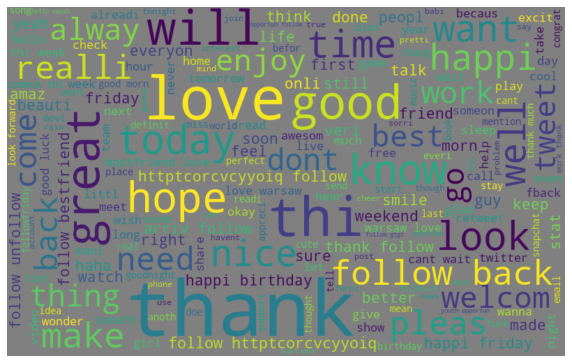

In [14]:
plot_wordCloud(processed_pos_tweets)

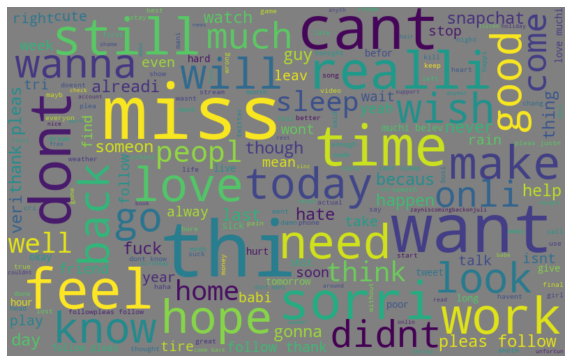

In [15]:
plot_wordCloud(processed_neg_tweets)

# Hashtag's Analysis

In [16]:
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    return hashtags

In [17]:
HT_regular=hashtag_extract(processed_pos_tweets)
HT_negative=hashtag_extract(processed_neg_tweets)
HT_regular=sum(HT_regular,[])
HT_negative=sum(HT_negative,[])

# Hashtag's in Non-racist tweets

[Text(0, 0.5, 'Number of Tweets')]

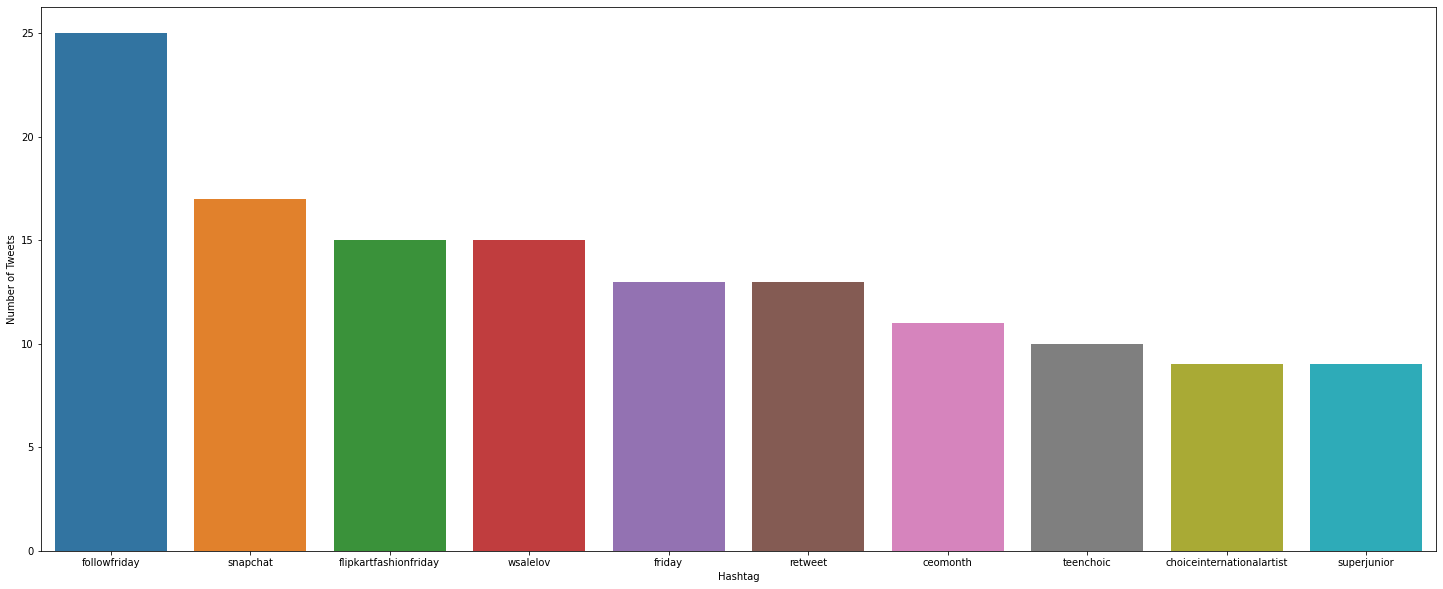

In [18]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 15 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(25,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Number of Tweets')

# Hashtag's in Racist Tweets

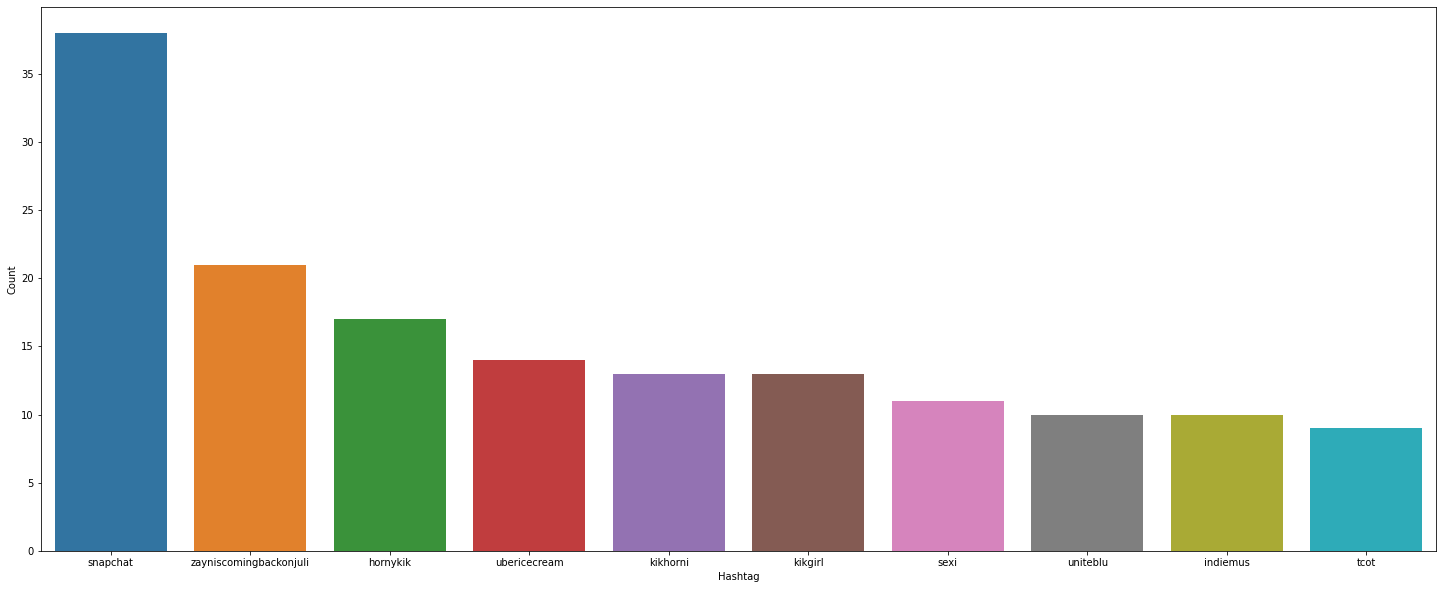

In [19]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 15 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(25,10))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [20]:
def pos_score(row):
    if(row['t_polarity']>2.0 and row['t_polarity']<=4.0):
        return 2
    if(row['t_polarity']>0.0 and row['t_polarity']<=2.0):
        return 1
    if(row['t_polarity']==0.0):
        return 0
def neg_score(row):
    if(row['t_polarity']>=2.0 and row['t_polarity']<=4.0):
        return -2
    if(row['t_polarity']>0.0 and row['t_polarity']<2.0):
        return -1
    if(row['t_polarity']==0.0):
        return 0

In [21]:
#TF-IDF on positive tweets
vectorizer_pos= TfidfVectorizer(min_df=5,max_df=0.75,ngram_range=(1,3),max_features=10000)
vectors=vectorizer_pos.fit_transform(processed_pos_tweets)
feature_names = vectorizer_pos.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()    
pos_df= pd.DataFrame(denselist, columns=feature_names)

#Scoring
pos_df["t_polarity"]=pos_df.sum(axis=1)
pos_df['t_polarity'] =pos_df.apply(pos_score, axis='columns')
print(pos_df['t_polarity'].value_counts())
pos_df=pos_df.dropna()

1.0    2688
2.0    1984
0.0     292
Name: t_polarity, dtype: int64


In [22]:
pos_df

,abl,about,about that,about thi,about your,absolut,account,activ,actual,ad,...,your right,your tweet,your welcom,your work,youth,youth opportun,youth opportun follow,youtub,youv,t_polarity
1,0.395621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
#TF-IDF on negative tweets
vectorizer_neg= TfidfVectorizer(min_df=5,max_df=0.75,ngram_range=(1,3),max_features=10000)
vectors=vectorizer_neg.fit_transform(processed_neg_tweets)
feature_names = vectorizer_neg.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
neg_df= pd.DataFrame(denselist, columns=feature_names)

#Scoring
neg_df["t_polarity"]=neg_df.sum(axis=1)
neg_df['t_polarity'] =neg_df.apply(neg_score, axis='columns')
print(neg_df['t_polarity'].value_counts())
neg_df=neg_df.dropna()

-1.0    2818
-2.0    1751
 0.0     387
Name: t_polarity, dtype: int64


In [24]:
neg_df

,abl,about,about thi,absolut,account,activ,actual,afford,after,again,...,yesterday,youll,your,your life,yourself,youtub,youv,zayn,zayniscomingbackonjuli,t_polarity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#Finale dataframe
df= pos_df.append(neg_df, ignore_index=True)
print(df["t_polarity"].value_counts())
df.fillna(-99999,inplace=True)

-1.0    2818
 1.0    2688
 2.0    1984
-2.0    1751
 0.0     679
Name: t_polarity, dtype: int64


In [26]:
df

,abl,about,about that,about thi,about your,absolut,account,activ,actual,ad,...,women,wont abl,work cant,wors,worst,would have,wrong with,yourself,zayn,zayniscomingbackonjuli
0,0.395621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,0.000000,0.0,-99999.0,0.0,-99999.0,0.0,0.0,0.0,0.0,-99999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9916,0.000000,0.0,-99999.0,0.0,-99999.0,0.0,0.0,0.0,0.0,-99999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9917,0.000000,0.0,-99999.0,0.0,-99999.0,0.0,0.0,0.0,0.0,-99999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9918,0.000000,0.0,-99999.0,0.0,-99999.0,0.0,0.0,0.0,0.0,-99999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
y=df["t_polarity"]
X=df.drop(["t_polarity"], 1)

In [29]:
X

,abl,about,about that,about thi,about your,absolut,account,activ,actual,ad,...,women,wont abl,work cant,wors,worst,would have,wrong with,yourself,zayn,zayniscomingbackonjuli
0,0.395621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,0.000000,0.0,-99999.0,0.0,-99999.0,0.0,0.0,0.0,0.0,-99999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9916,0.000000,0.0,-99999.0,0.0,-99999.0,0.0,0.0,0.0,0.0,-99999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9917,0.000000,0.0,-99999.0,0.0,-99999.0,0.0,0.0,0.0,0.0,-99999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9918,0.000000,0.0,-99999.0,0.0,-99999.0,0.0,0.0,0.0,0.0,-99999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#Partitioning into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# 1. SUPPORT VECTOR MACHINE

In [33]:
from sklearn.svm import SVR
model1=SVR()
model1.fit(X_train,y_train)

SVR()

In [36]:
acc_svr=model1.score(X_test, y_test)
print(acc_svr)

0.8067900490942609


# 2. DESICION TREE

In [37]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2_test=model2.predict(X_test)
acc_dtree=metrics.accuracy_score(y_test, y_pred2_test)
print(acc_dtree)

0.8726478494623656


In [38]:
print(classification_report(y_test,y_pred2_test))

              precision    recall  f1-score   support

        -2.0       0.90      0.87      0.89       518
        -1.0       0.92      0.88      0.90       817
         0.0       0.64      1.00      0.78       218
         1.0       0.91      0.83      0.87       851
         2.0       0.87      0.87      0.87       572

    accuracy                           0.87      2976
   macro avg       0.85      0.89      0.86      2976
weighted avg       0.88      0.87      0.87      2976



# 3. RANDOM FOREST

In [39]:
from sklearn.ensemble import RandomForestClassifier
model3= RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred3_test =model3.predict(X_test)
acc_rf=metrics.accuracy_score(y_test, y_pred3_test)
print(acc_rf)

0.8716397849462365


In [40]:
print(classification_report(y_test,y_pred3_test))

              precision    recall  f1-score   support

        -2.0       0.95      0.80      0.87       518
        -1.0       0.87      0.90      0.89       817
         0.0       0.62      1.00      0.77       218
         1.0       0.88      0.89      0.89       851
         2.0       0.96      0.82      0.89       572

    accuracy                           0.87      2976
   macro avg       0.86      0.88      0.86      2976
weighted avg       0.89      0.87      0.87      2976



# 4. MULTINOMIAL LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression
model4= LogisticRegression(multi_class='multinomial',solver='newton-cg')
model4.fit(X_train, y_train)
y_pred4_test =model4.predict(X_test)
acc_lr=metrics.accuracy_score(y_test, y_pred4_test)
print(acc_lr)

0.646505376344086


In [42]:
print(classification_report(y_test,y_pred4_test))

              precision    recall  f1-score   support

        -2.0       0.76      0.24      0.36       518
        -1.0       0.60      0.95      0.74       817
         0.0       0.00      0.00      0.00       218
         1.0       0.65      0.91      0.76       851
         2.0       0.76      0.44      0.56       572

    accuracy                           0.65      2976
   macro avg       0.55      0.51      0.48      2976
weighted avg       0.63      0.65      0.59      2976

